In [2]:
import pandas as pd
import supy as sp
import matplotlib.pyplot as plt
from functions.night import *
from functions.dict_legend import *
in_folder = '../data/'
sp.show_version()

SuPy version: 2023.7.3.dev0
-------------


In [5]:
s_rc = in_folder + 'sample_data/RunControl.nml'         # OHM. Sampledata Q* modelled with L↓ modelled using air temperature and relative humidity supplied in meteorological forcing file [Loridan et al., 2011]. Zenith angle not accounted for in albedo calculation.d
s2_rc = in_folder + 'sample_data2/RunControl.nml'       # Sampledata SpartacusESTM, standard values in GridLayout
s3_rc = in_folder + 'sample_data3/RunControl.nml'       # Sampledata SpartacusESTM Thicker first layer wall all three layers. 1.2 instad of .2
s3x_rc = in_folder + 'sample_data3x/RunControl.nml'     # Sampledata SpartacusESTM Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
s4_rc = in_folder + 'sample_data4/RunControl.nml'       # Sampledata SpartacusESTM wall albedo lowered .25 instad of .5
s5_rc = in_folder + 'sample_data5/RunControl.nml'       # Sampledata SpartacusESTM wall emissivity lower .9 instead of .95
s6_rc = in_folder + 'sample_data6/RunControl.nml'       # Sampledata SpartacusESTM Thermal conductivity of layer 1 lower. .8 instead of 1.2
s7_rc = in_folder + 'sample_data7/RunControl.nml'       # Sampledata SpartacusESTM Thermal conductivity of layer 2 (insulation) lower. .2 instead of 1.2

df_state_init_s = sp.init_supy(s_rc)
df_state_init_s2 = sp.init_supy(s2_rc)
df_state_init_s3 = sp.init_supy(s3_rc)
df_state_init_s3x = sp.init_supy(s3x_rc)
df_state_init_s4 = sp.init_supy(s4_rc)
df_state_init_s5 = sp.init_supy(s5_rc)
df_state_init_s6 = sp.init_supy(s6_rc)
df_state_init_s7 = sp.init_supy(s7_rc)

2024-03-01 13:06:31,620 - SuPy - INFO - All cache cleared.
2024-03-01 13:06:33,024 - SuPy - INFO - All cache cleared.
2024-03-01 13:06:34,257 - SuPy - INFO - All cache cleared.
2024-03-01 13:06:35,770 - SuPy - INFO - All cache cleared.
2024-03-01 13:06:37,218 - SuPy - INFO - All cache cleared.
2024-03-01 13:06:38,877 - SuPy - INFO - All cache cleared.
2024-03-01 13:06:40,393 - SuPy - INFO - All cache cleared.
2024-03-01 13:06:41,781 - SuPy - INFO - All cache cleared.


In [6]:
# standard settings
#print(df_state_init_s.columns.tolist())
df_state_init_s.filter(like='sfr')


var     sfr_surf                                  
ind_dim     (0,)  (1,) (2,)  (3,)  (4,) (5,)  (6,)
grid                                              
1           0.43  0.38  0.0  0.02  0.03  0.0  0.14

In [7]:
# standard wall thickness
df_state_init_s2.loc[:, 'dz_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01


In [8]:
# standard wall cp
df_state_init_s2.loc[:, 'cp_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,3000000.0,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0,3000000.0,2000000.0,2000000.0,2000000.0,2000000.0,3000000.0,2000000.0,2000000.0,2000000.0


In [9]:
# standard wall k
df_state_init_s2.loc[:, 'k_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2


In [10]:
# wall with new k in insulation layer (2)
df_state_init_s7.loc[:, 'k_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,1.2,0.2,1.2,1.2,1.2,1.2,0.2,1.2,1.2,1.2,1.2,0.2,1.2,1.2,1.2


In [11]:
# Metdata 
grid = df_state_init_s.index[0]
df_forcing = sp.load_forcing_grid(s_rc, grid)
s = '2012 07 1'
s2 = '2012 07 10'
e = '2012 07 31'

# # warm week 2012  to reduce time for test setup
df_forcing=df_forcing.loc[s: e].iloc[1:]
df_forcing2=df_forcing.loc[s2: e].iloc[1:]


2024-03-01 13:06:43,364 - SuPy - INFO - All cache cleared.


In [12]:
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)
df_output_s2b, df_state_final_s2b = sp.run_supy(df_forcing2, df_state_init_s2)

2024-03-01 13:06:53,021 - SuPy - INFO - ====================
2024-03-01 13:06:53,023 - SuPy - INFO - Simulation period:
2024-03-01 13:06:53,024 - SuPy - INFO -   Start: 2012-07-01 00:05:00
2024-03-01 13:06:53,025 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-03-01 13:06:53,026 - SuPy - INFO - 
2024-03-01 13:06:53,026 - SuPy - INFO - No. of grids: 1
2024-03-01 13:06:53,027 - SuPy - INFO - SuPy is running in serial mode
2024-03-01 13:12:44,470 - SuPy - INFO - Execution time: 351.4 s
2024-03-01 13:12:44,471 - SuPy - INFO - ====================

2024-03-01 13:12:44,473 - SuPy - INFO - ====================
2024-03-01 13:12:44,474 - SuPy - INFO - Simulation period:
2024-03-01 13:12:44,476 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-03-01 13:12:44,478 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-03-01 13:12:44,480 - SuPy - INFO - 
2024-03-01 13:12:44,481 - SuPy - INFO - No. of grids: 1
2024-03-01 13:12:44,483 - SuPy - INFO - SuPy is running in serial mode
2024-03-01 13:16:49,354 - 

<AxesSubplot:title={'center':'Testing spinup time for Spartacus'}, xlabel='datetime'>

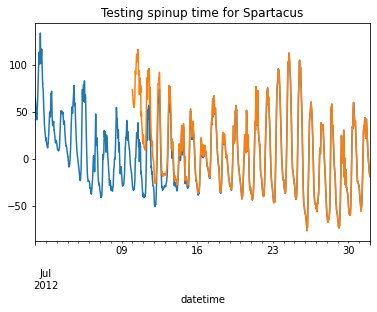

In [13]:
# check spin-up time
df_output_s2.SUEWS.loc[grid].loc[:,'QS'].plot(title='Testing spinup time for Spartacus')
df_output_s2b.SUEWS.loc[grid].loc[:,'QS'].plot()

2024-03-01 13:16:56,808 - SuPy - INFO - All cache cleared.


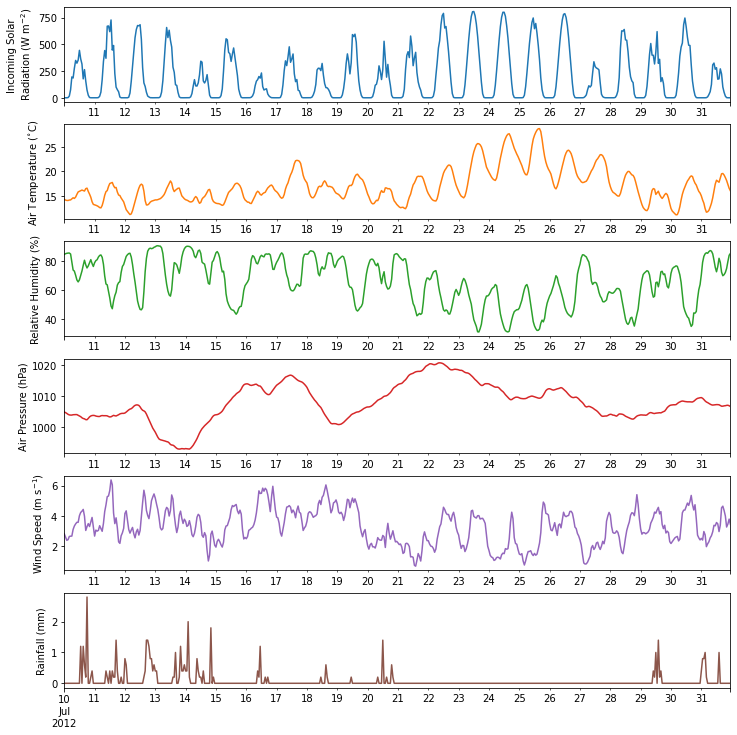

In [14]:
# looks like one week spinup is ok
#load full dataset again and select short period for further inspection
df_forcing = sp.load_forcing_grid(s_rc, grid)
df_forcing=df_forcing.loc[s2: e].iloc[1:]


# plot forcing data
df_plot_forcing_x = df_forcing.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

# Run

In [15]:
df_output_s, df_state_final_s = sp.run_supy(df_forcing, df_state_init_s)
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)
df_output_s3, df_state_final_s3 = sp.run_supy(df_forcing, df_state_init_s3)
df_output_s3x, df_state_final_s3x = sp.run_supy(df_forcing, df_state_init_s3x)
df_output_s4, df_state_final_s4 = sp.run_supy(df_forcing, df_state_init_s4)
df_output_s5, df_state_final_s5 = sp.run_supy(df_forcing, df_state_init_s5)
df_output_s6, df_state_final_s6 = sp.run_supy(df_forcing, df_state_init_s6)
df_output_s7, df_state_final_s7 = sp.run_supy(df_forcing, df_state_init_s7)

2024-03-01 13:17:07,297 - SuPy - INFO - ====================
2024-03-01 13:17:07,298 - SuPy - INFO - Simulation period:
2024-03-01 13:17:07,299 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-03-01 13:17:07,300 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-03-01 13:17:07,301 - SuPy - INFO - 
2024-03-01 13:17:07,302 - SuPy - INFO - No. of grids: 1
2024-03-01 13:17:07,303 - SuPy - INFO - SuPy is running in serial mode
2024-03-01 13:17:11,589 - SuPy - INFO - Execution time: 4.3 s
2024-03-01 13:17:11,590 - SuPy - INFO - ====================

2024-03-01 13:17:11,590 - SuPy - INFO - ====================
2024-03-01 13:17:11,592 - SuPy - INFO - Simulation period:
2024-03-01 13:17:11,593 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-03-01 13:17:11,595 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-03-01 13:17:11,596 - SuPy - INFO - 
2024-03-01 13:17:11,597 - SuPy - INFO - No. of grids: 1
2024-03-01 13:17:11,598 - SuPy - INFO - SuPy is running in serial mode
2024-03-01 13:21:07,317 - Su

In [16]:
# Start and end date for inspection
s = '2012-07-10'
e = '2012-07-30'

# OHM
# Spartacus_2           Sampledata Spartacus, standard values in GridLayout
# Spartacus_3           Sampledata Spartacus Thicker first layer wall all three layers. 1.2 instad of .2
# Spartacus_3x          Sampledata Spartacus Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
# Spartacus_4           Sampledata Spartacus wall albedo lowered .25 instad of .5
# Spartacus_5           Sampledata Spartacus wall emissivity lower .9 instead of .95
# Spartacus_6           Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2
# Spartatus_7           Sampledata Spartacus Thermal conductivity of layer 2 lower. .2 instead of 1.2

outputIn = [df_output_s.loc[grid].loc[s:e,:],df_output_s2.loc[grid].loc[s:e,:], df_output_s3.loc[grid].loc[s:e,:], df_output_s3x.loc[grid].loc[s:e,:],df_output_s4.loc[grid].loc[s:e,:], df_output_s5.loc[grid].loc[s:e,:], df_output_s6.loc[grid].loc[s:e,:], df_output_s7.loc[grid].loc[s:e,:], ]
namesIn = ['OHM', 'SS_default_alb0.5_emis0.95_k1.2', 'SS_thickerwallAll', 'SS_thickerwallVary','SS_alb0.25', 'SS_emis0.90','SS_k0.8first', 'SS_k0.2second',]
df_output_merge_x=pd.concat(outputIn,axis=1,join='inner', keys = namesIn).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1) #.loc[grid]
df_merge=df_output_merge_x.SUEWS

outputInNoOHM = [df_output_s2.loc[grid].loc[s:e,:], df_output_s3.loc[grid].loc[s:e,:], df_output_s3x.loc[grid].loc[s:e,:],df_output_s4.loc[grid].loc[s:e,:], df_output_s5.loc[grid].loc[s:e,:], df_output_s6.loc[grid].loc[s:e,:], df_output_s7.loc[grid].loc[s:e,:], ]
namesInNoOHM = ['SS_default_alb0.5_emis0.95_k1.2', 'SS_thickerwallAll', 'SS_thickerwallVary','SS_alb0.25', 'SS_emis0.90','SS_k0.8first', 'SS_k0.2second',]
df_output_merge_xNOOHM=pd.concat(outputInNoOHM,axis=1,join='inner', keys = namesInNoOHM).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1) #.loc[grid]
df_mergeNoOHM=df_output_merge_xNOOHM.SUEWS

# add available energy, AE
df_merge=df_merge.stack().eval('AE=QN+QF-QS').unstack()

#df_merge = merge_output([df_output_s2, df_output_s3, df_output_s3x,df_output_s4, df_output_s5, df_output_s6, df_output_s7, ], ['Spartacus_2', 'Spartacus_3', 'Spartacus_3x','Spartacus_4', 'Spartacus_5','Spartacus_6', 'Spartacus_7',])

# Plot

In [17]:
# Start and end date for inspection
s = '2012-07-21'
e = '2012-07-30'

In [18]:
df_merge = df_merge.stack().eval('BowenRatio=QH/QE').unstack()
df_merge = df_merge.stack().eval('QS_f=QS/(QN+QF)').unstack()
df_merge = df_merge.stack().eval('QH_f=QH/(QN+QF)').unstack()
df_merge = df_merge.stack().eval('QE_f=QE/(QN+QF)').unstack()


<AxesSubplot:title={'center':'Qs for one warm week in July'}, xlabel='datetime'>

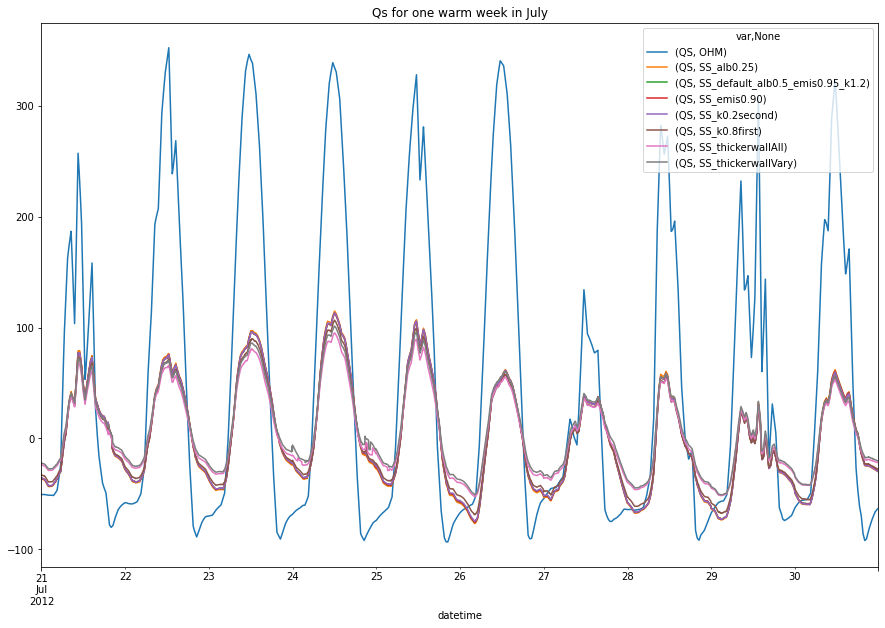

In [19]:
var = 'QS'

df_merge.loc[s:e,[var]].plot(figsize=(15,10), title='Qs for one warm week in July')

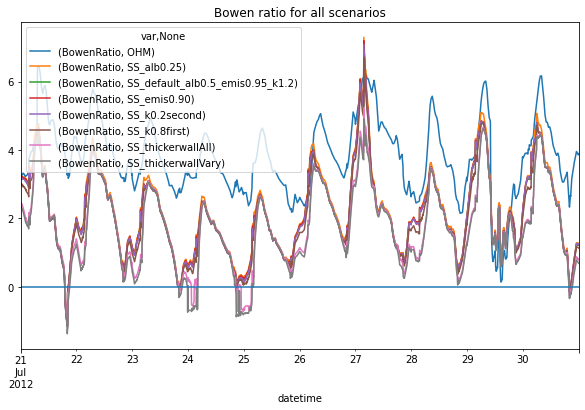

In [20]:
#This is probably not correct as we use very short spin-up time

var = 'BowenRatio'

# s = '2012-07-28 15:00'
# e = '2012-07-28 17:00'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6), title='Bowen ratio for all scenarios')
# df_merge.loc[s:e,[var]]

ax.axhline(0,0)

var                 BowenRatio                                             \
                           OHM SS_alb0.25 SS_default_alb0.5_emis0.95_k1.2   
datetime                                                                    
2012-07-26 00:00:00   2.613386   1.840536                        1.792003   
2012-07-26 00:05:00   2.603428   1.841164                        1.790383   
2012-07-26 00:10:00   2.593360   1.843832                        1.792133   
2012-07-26 00:15:00   2.583170   1.847408                        1.794572   
2012-07-26 00:20:00   2.572847   1.849637                        1.797186   
...                        ...        ...                             ...   
2012-07-30 23:35:00   3.886121   1.279132                        1.208668   
2012-07-30 23:40:00   3.876662   1.278318                        1.223235   
2012-07-30 23:45:00   3.867290   1.277417                        1.222514   
2012-07-30 23:50:00   3.857992   1.276489                        1.205599   
2012-07-30 23:55:00   3.892864   1.266791                        1.209785   

var                                                                           \
                    SS_emis0.90 SS_k0.2second SS_k0.8first SS_thickerwallAll   
datetime                                                                       
2012-07-26 00:00:00    1.809342      1.759050     1.592046          1.144196   
2012-07-26 00:05:00    1.807811      1.756948     1.588788          1.133024   
2012-07-26 00:10:00    1.809658      1.758258     1.590339          1.121281   
2012-07-26 00:15:00    1.812198      1.760282     1.589617          1.118341   
2012-07-26 00:20:00    1.815200      1.763407     1.589446          1.110224   
...                         ...           ...          ...               ...   
2012-07-30 23:35:00    1.246881      1.260062     1.150467          0.825720   
2012-07-30 23:40:00    1.245808      1.243433     1.147622          0.798893   
2012-07-30 23:45:00    1.244723      1.257441     1.144743          0.809819   
2012-07-30 23:50:00    1.243627      1.256745     1.141831          0.802087   
2012-07-30 23:55:00    1.233626      1.246706     1.132061          0.788256   

var                                     
                    SS_thickerwallVary  
datetime                                
2012-07-26 00:00:00           1.033344  
2012-07-26 00:05:00           1.023167  
2012-07-26 00:10:00           1.010416  
2012-07-26 00:15:00           1.007637  
2012-07-26 00:20:00           0.998924  
...                                ...  
2012-07-30 23:35:00           0.727319  
2012-07-30 23:40:00           0.719151  
2012-07-30 23:45:00           0.710871  
2012-07-30 23:50:00           0.702477  
2012-07-30 23:55:00           0.685702  

[1440 rows x 8 columns]

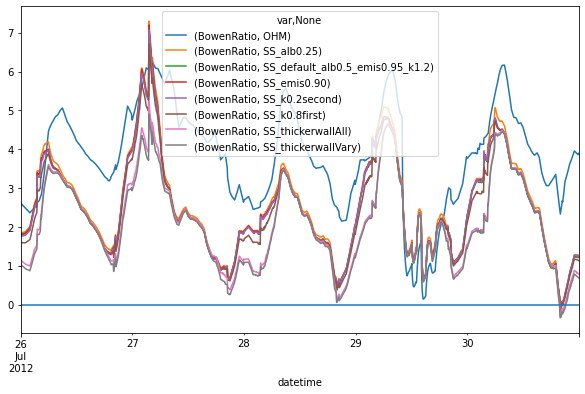

In [21]:
var = 'BowenRatio'
s = '2012-07-26'
e = '2012-07-30'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6))
ax.axhline(0,0)

df_merge.loc[s:e,[var]]


var                 BowenRatio                                             \
                           OHM SS_alb0.25 SS_default_alb0.5_emis0.95_k1.2   
datetime                                                                    
2012-07-26 18:30:00   3.243792   1.469801                        1.369838   
2012-07-26 18:35:00   3.237095   1.458692                        1.363350   
2012-07-26 18:40:00   3.229968   1.451078                        1.361186   
2012-07-26 18:45:00   3.205748   1.443552                        1.349224   
2012-07-26 18:50:00   3.197917   1.442213                        1.341326   
2012-07-26 18:55:00   3.189900   1.428460                        1.340522   
2012-07-26 19:00:00   3.181819   1.419731                        1.333985   

var                                                                           \
                    SS_emis0.90 SS_k0.2second SS_k0.8first SS_thickerwallAll   
datetime                                                                       
2012-07-26 18:30:00    1.376298      1.365006     1.365677          1.323248   
2012-07-26 18:35:00    1.370563      1.358285     1.361663          1.313126   
2012-07-26 18:40:00    1.368761      1.355877     1.347924          1.297600   
2012-07-26 18:45:00    1.362106      1.348737     1.342780          1.276675   
2012-07-26 18:50:00    1.350100      1.341331     1.327662          1.263349   
2012-07-26 18:55:00    1.342655      1.334282     1.316543          1.239428   
2012-07-26 19:00:00    1.342944      1.320871     1.312516          1.224587   

var                                     
                    SS_thickerwallVary  
datetime                                
2012-07-26 18:30:00           1.270229  
2012-07-26 18:35:00           1.258391  
2012-07-26 18:40:00           1.240879  
2012-07-26 18:45:00           1.222143  
2012-07-26 18:50:00           1.202240  
2012-07-26 18:55:00           1.180630  
2012-07-26 19:00:00           1.151952

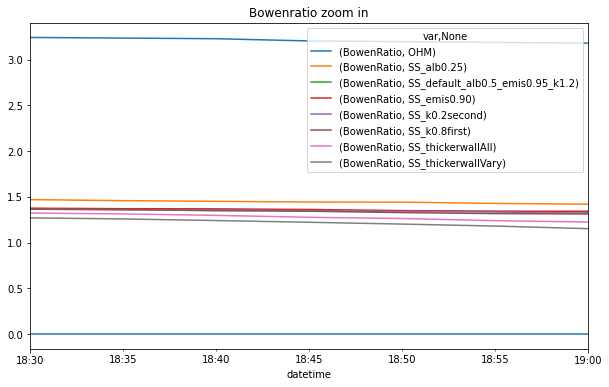

In [22]:
var = 'BowenRatio'

s = '2012-07-26 18:30'
e = '2012-07-26 19:00'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6),title='Bowenratio zoom in')
ax.axhline(0,0)

df_merge.loc[s:e,[var]]

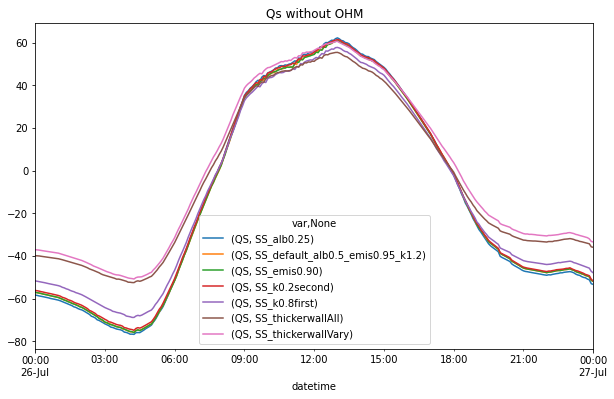

In [23]:
var = 'QS'

s = '2012-07-26 00:00'
e = '2012-07-27 00:00'

ax = df_mergeNoOHM.loc[s:e,[var]].plot(figsize=(10,6), title='Qs without OHM')



<AxesSubplot:xlabel='datetime'>

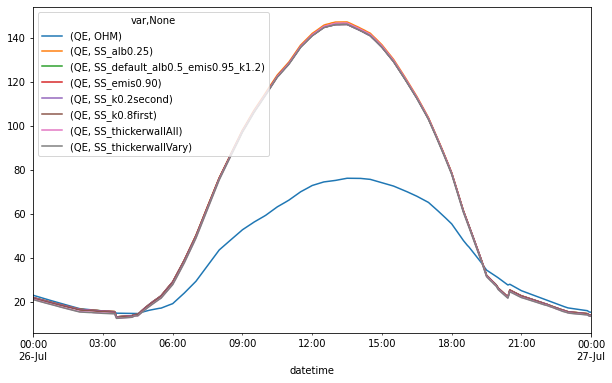

In [24]:
var = 'QE'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc[s:e,[var]]


<AxesSubplot:xlabel='datetime'>

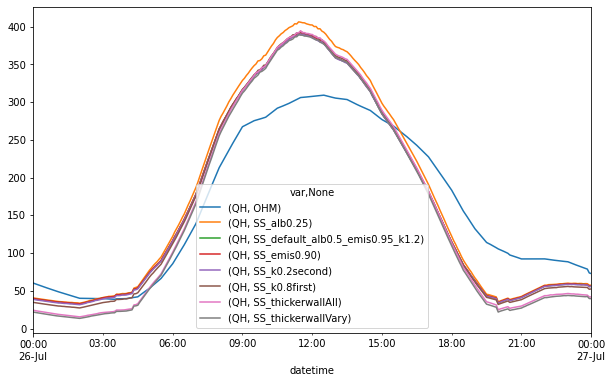

In [25]:
var = 'QH'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc['2012-07-24 11:00': '2012-07-24 11:30',[var]]


<AxesSubplot:xlabel='datetime'>

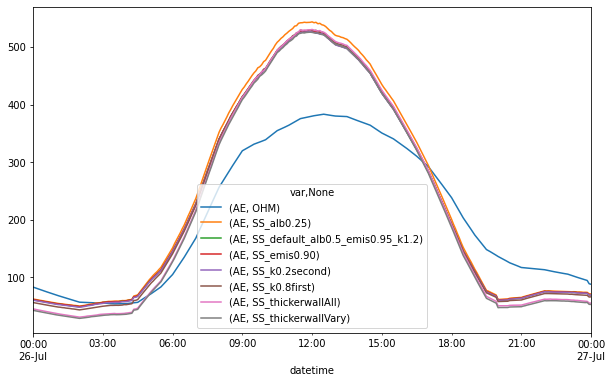

In [26]:
var = 'AE'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc['2012-07-24 11:00': '2012-07-24 11:30',[var]]


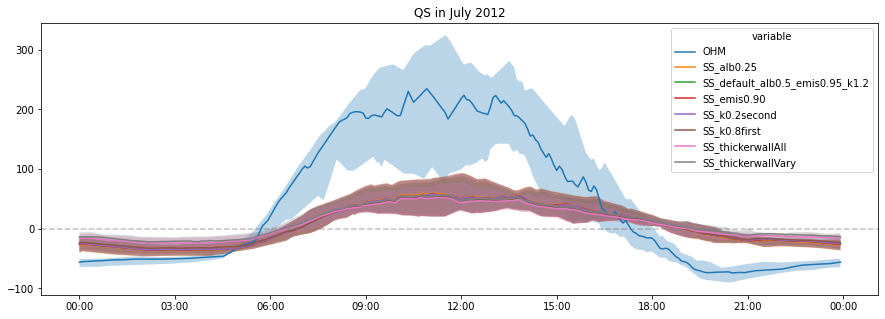

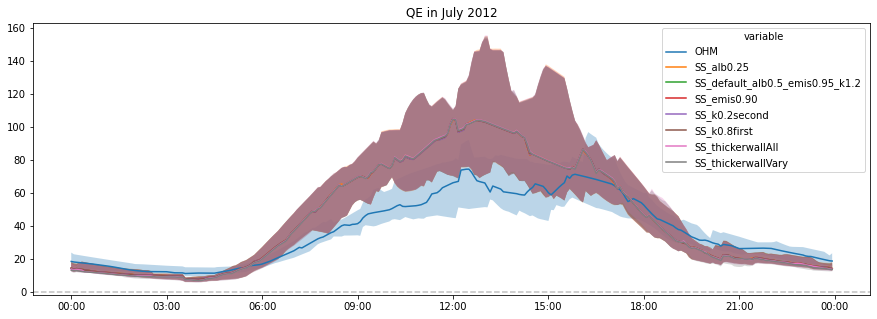

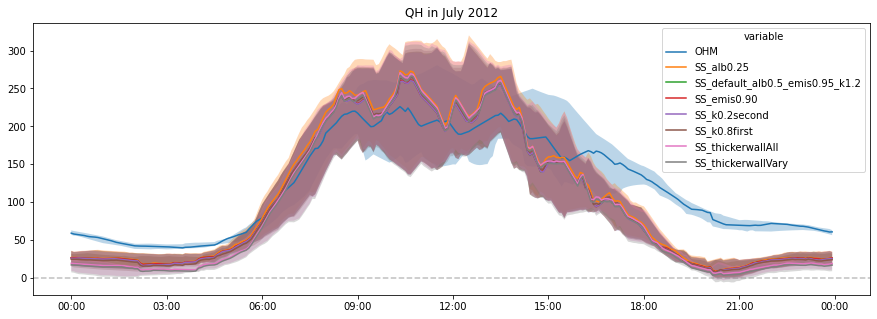

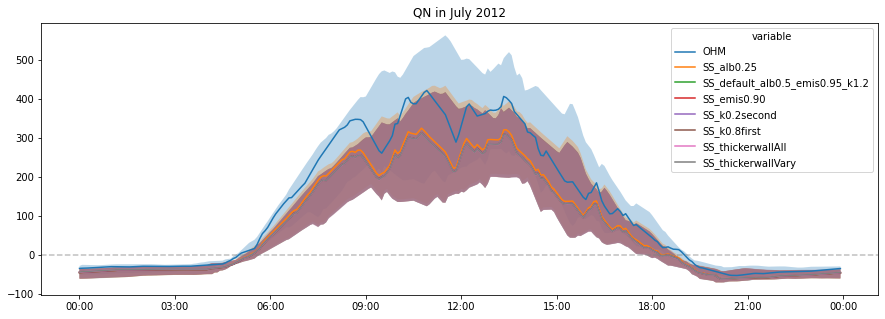

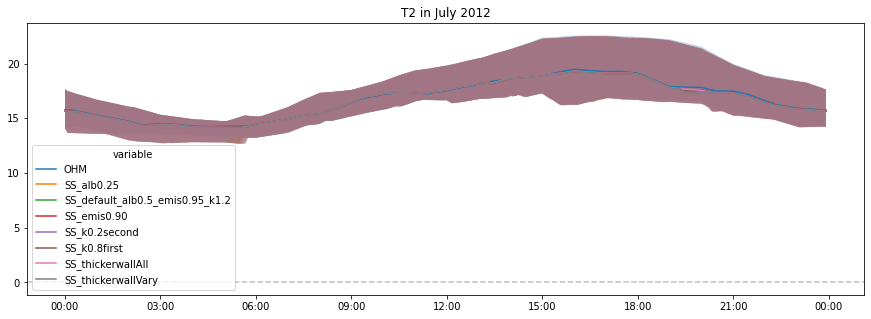

In [27]:

for var in ['QS','QE','QH', 'QN', 'T2']:
    fig, ax = plt.subplots(figsize=(15,5))
    fig,ax=sp.util.plot_day_clm(df_merge.loc['2012 7',var],fig=fig)
    _=ax.set_title(var + ' in July 2012')
    ax.axhline(0,0, linestyle = '--', color = 'grey', alpha = 0.5)
    



# Säve

In [19]:
# Here come Save airport analysis NOT DONE YET
s_rc = in_folder + 'saveairport_base/RunControl.nml'         # Input data from Säve airport. 
df_state_init_save = sp.init_supy(s_rc)


2024-03-04 13:23:13,074 - SuPy - INFO - All cache cleared.


In [20]:
# Metdata
grid = df_state_init_save.index[0]
df_forcing_save = sp.load_forcing_grid(s_rc, grid)


2024-03-04 13:23:16,988 - SuPy - INFO - All cache cleared.


In [131]:
# Load observation data
obsdata = pd.read_csv(in_folder + 'saveairport_base/FluxAsCSV_SaveAirport.csv',header=0, sep=';')
obsdata.index = pd.to_datetime({'year': obsdata['year'],'month':obsdata['month'],'day': obsdata['day']}) + pd.to_timedelta(obsdata['time'])

In [21]:
#testrun
df_output_save, df_state_final_save = sp.run_supy(df_forcing_save, df_state_init_save)

2024-03-04 13:23:21,727 - SuPy - INFO - ====================
2024-03-04 13:23:21,727 - SuPy - INFO - Simulation period:
2024-03-04 13:23:21,728 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2024-03-04 13:23:21,729 - SuPy - INFO -   End: 2004-04-14 21:00:00
2024-03-04 13:23:21,730 - SuPy - INFO - 
2024-03-04 13:23:21,731 - SuPy - INFO - No. of grids: 1
2024-03-04 13:23:21,732 - SuPy - INFO - SuPy is running in serial mode
2024-03-04 13:23:30,409 - SuPy - INFO - Execution time: 8.7 s
2024-03-04 13:23:30,411 - SuPy - INFO - ====================



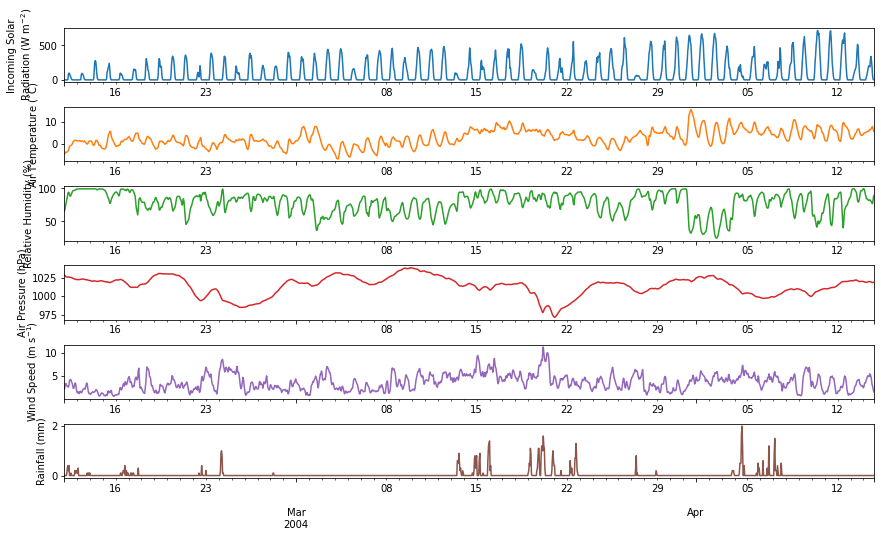

In [22]:
# plot forcing data
df_plot_forcing_x = df_forcing_save.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(12, 8),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

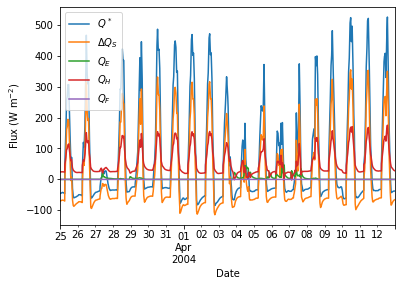

In [23]:
#Plot output for test run
df_output_test = df_output_save['SUEWS']
# a dict for better display variable names
dict_var_disp = {
    'QN': '$Q^*$',
    'QS': r'$\Delta Q_S$',
    'QE': '$Q_E$',
    'QH': '$Q_H$',
    'QF': '$Q_F$',
    'Kdown': r'$K_{\downarrow}$',
    'Kup': r'$K_{\uparrow}$',
    'Ldown': r'$L_{\downarrow}$',
    'Lup': r'$L_{\uparrow}$',
    'Rain': '$P$',
    'Irr': '$I$',
    'Evap': '$E$',
    'RO': '$R$',
    'TotCh': '$\Delta S$',
}
ax_output = df_output_test\
    .loc[grid]\
    .loc['2004 3 25':'2004 4 12',
         ['QN', 'QS', 'QE', 'QH', 'QF']]\
    .rename(columns=dict_var_disp)\
    .plot()
_ = ax_output.set_xlabel('Date')
_ = ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
_ = ax_output.legend()

In [24]:
# test to run with ECH and Spartacus
s_rc_a1 = in_folder + 'saveairport_base/RunControl.nml'             # Input data from Säve airport. OHM and NARP 
s2_rc_a2 = in_folder + 'saveairport_NarpECH/RunControl.nml'         # Input data from Säve airport. ECH and NARP 
s3_rc_a3 = in_folder + 'saveairport_ECHSS/RunControl.nml'          # Input data from Säve airport. ECH and SS 

df_state_init_a1 = sp.init_supy(s_rc_a1)
df_state_init_a2 = sp.init_supy(s2_rc_a2)
#df_state_init_a3 = sp.init_supy(s3_rc_a3)

df_output_a1, df_state_final_a1 = sp.run_supy(df_forcing_save, df_state_init_a1)
df_output_a2, df_state_final_a2 = sp.run_supy(df_forcing_save, df_state_init_a2)
#df_output_a3, df_state_final_a3 = sp.run_supy(df_forcing_save, df_state_init_a3) #Crashing

2024-03-04 13:23:53,589 - SuPy - INFO - All cache cleared.
2024-03-04 13:23:55,061 - SuPy - INFO - All cache cleared.
2024-03-04 13:23:56,417 - SuPy - INFO - ====================
2024-03-04 13:23:56,419 - SuPy - INFO - Simulation period:
2024-03-04 13:23:56,420 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2024-03-04 13:23:56,422 - SuPy - INFO -   End: 2004-04-14 21:00:00
2024-03-04 13:23:56,423 - SuPy - INFO - 
2024-03-04 13:23:56,424 - SuPy - INFO - No. of grids: 1
2024-03-04 13:23:56,426 - SuPy - INFO - SuPy is running in serial mode
2024-03-04 13:24:04,783 - SuPy - INFO - Execution time: 8.4 s
2024-03-04 13:24:04,784 - SuPy - INFO - ====================

2024-03-04 13:24:04,794 - SuPy - INFO - ====================
2024-03-04 13:24:04,795 - SuPy - INFO - Simulation period:
2024-03-04 13:24:04,797 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2024-03-04 13:24:04,799 - SuPy - INFO -   End: 2004-04-14 21:00:00
2024-03-04 13:24:04,800 - SuPy - INFO - 
2024-03-04 13:24:04,801 - SuPy - INFO

<AxesSubplot:title={'center':'Testing Qs between OHM and ECH'}, xlabel='datetime'>

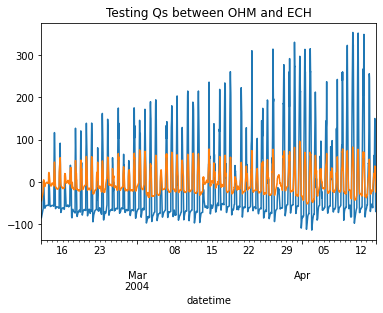

In [25]:
#Quick plot Qs
df_output_a1.SUEWS.loc[grid].loc[:,'QS'].plot(title='Testing Qs between OHM and ECH')
df_output_a2.SUEWS.loc[grid].loc[:,'QS'].plot()

In [150]:
obsdata['Qg'].replace(999.0, np.nan, inplace=True)
new = df_output_a1.SUEWS.loc[grid]
df_comp = pd.concat([obsdata,new]).resample('1h').mean()

276.8355

<AxesSubplot:title={'center':'Testing Qs between OHM and ECH'}>

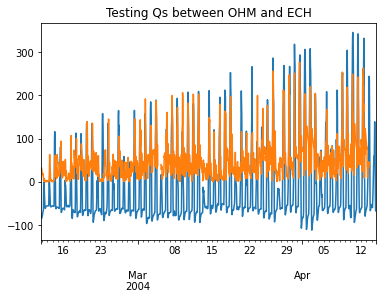

In [152]:
df_comp.loc[:,'QS'].plot(title='Testing Qs between OHM and ECH')
df_comp.loc[:,'Qg'].plot()

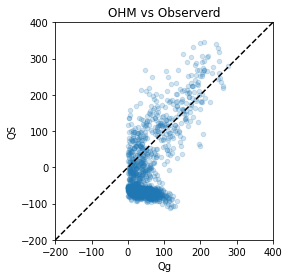

In [158]:
ax = df_comp.plot.scatter(x="Qg", y="QS", alpha=0.2, style="..", title='OHM vs Observerd')
_ = ax.set_aspect("equal", "box")
_ = ax.set_xlim(-200, 400)
_ = ax.set_ylim(-200, 400)
_ = ax.plot([-200, 400], [-200, 400], "k--")

In [159]:
# Setting correct ground layer parameters (807 from ESTM coefficients, used in Lindberg et al. 2020)
# EHC as heat storage scheme
df_state_ehc = df_state_init_a2.copy()
df_state_ehc.storageheatmethod = 5

# modify the depth of the vertical layers
ar_depth = np.repeat(np.array([[0.05, 0.3, 0.5, 0.7, 0.01]]), 7, axis=0).flatten()
df_state_ehc.loc[:, "dz_surf"] = ar_depth

# modify the heat capacity of the vertical layers
ar_cp = np.repeat(np.array([[1.86, 1.86, 1.2, 1.2, 1.2]])*1e6, 7, axis=0).flatten()
df_state_ehc.loc[:, "cp_surf"] = ar_cp

# modify the thermal conductivity of the vertical layers
ar_k = np.repeat(np.array([[0.759, 0.759, 0.63, 0.63, 0.63]]) , 7, axis=0).flatten()
df_state_ehc.loc[:, "k_surf"] = ar_k

df_output_ehc, df_state_final = sp.run_supy(df_forcing_save, df_state_ehc)


2024-03-06 15:35:53,237 - SuPy - INFO - ====================
2024-03-06 15:35:53,239 - SuPy - INFO - Simulation period:
2024-03-06 15:35:53,241 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2024-03-06 15:35:53,242 - SuPy - INFO -   End: 2004-04-14 21:00:00
2024-03-06 15:35:53,243 - SuPy - INFO - 
2024-03-06 15:35:53,244 - SuPy - INFO - No. of grids: 1
2024-03-06 15:35:53,245 - SuPy - INFO - SuPy is running in serial mode


2024-03-06 15:36:04,699 - SuPy - INFO - Execution time: 11.5 s
2024-03-06 15:36:04,700 - SuPy - INFO - ====================



<AxesSubplot:title={'center':'Testing Qs between OHM and ECH (adjusted values, airport settings)'}, xlabel='datetime'>

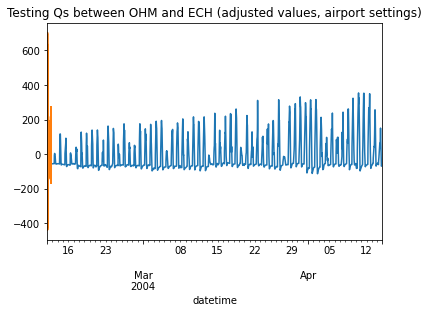

In [156]:
# Plot Qs with adjusted ground values
df_output_a1.SUEWS.loc[grid].loc[:,'QS'].plot(title='Testing Qs between OHM and ECH (adjusted values, airport settings)')
df_output_ehc.SUEWS.loc[grid].loc[:,'QS'].plot()

In [ ]:
# ECH gets unstalbe and produce NaN


# Kville

In [ ]:
kv_rc = in_folder + 'kville/RunControl.nml'        
kvt_rc = in_folder + 'kville_t/RunControl.nml'        

df_state_init_kv = sp.init_supy(kv_rc)
df_state_init_kvt = sp.init_supy(kvt_rc)


2024-03-01 10:00:58,855 - SuPy - INFO - All cache cleared.
2024-03-01 10:01:00,793 - SuPy - INFO - All cache cleared.


In [ ]:
# Metdata 
grid = df_state_init_kv.index[1]
df_forcing = sp.load_forcing_grid(kv_rc, grid)

2023-08-31 15:58:28,036 - SuPy - INFO - All cache cleared.


In [ ]:
df_forcing = df_forcing.loc['2018-05-28':'2018-06-05']

df_forcing

,iy,id,it,imin,qn,qh,qe,qs,qf,U,...,snow,ldown,fcld,Wuh,xsmd,lai,kdiff,kdir,wdir,isec
2018-05-28 00:00:00,2018,148,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,1.600000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:05:00,2018,148,0,5,-999.0,-999.0,-999.0,-999.0,-999.0,1.558333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:10:00,2018,148,0,10,-999.0,-999.0,-999.0,-999.0,-999.0,1.516667,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:15:00,2018,148,0,15,-999.0,-999.0,-999.0,-999.0,-999.0,1.475000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:20:00,2018,148,0,20,-999.0,-999.0,-999.0,-999.0,-999.0,1.433333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-05 23:35:00,2018,156,23,35,-999.0,-999.0,-999.0,-999.0,-999.0,1.108333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:40:00,2018,156,23,40,-999.0,-999.0,-999.0,-999.0,-999.0,1.066667,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:45:00,2018,156,23,45,-999.0,-999.0,-999.0,-999.0,-999.0,1.025000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:50:00,2018,156,23,50,-999.0,-999.0,-999.0,-999.0,-999.0,0.983333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0


In [ ]:
df_output_kv, df_state_final_kv = sp.run_supy(df_forcing, df_state_init_kv)
df_output_kvt, df_state_final_kvt = sp.run_supy(df_forcing, df_state_init_kvt)

2023-08-31 15:58:41,529 - SuPy - INFO - ====================
2023-08-31 15:58:41,530 - SuPy - INFO - Simulation period:
2023-08-31 15:58:41,531 - SuPy - INFO -   Start: 2018-05-28 00:00:00
2023-08-31 15:58:41,531 - SuPy - INFO -   End: 2018-06-05 23:55:00
2023-08-31 15:58:41,533 - SuPy - INFO - 
2023-08-31 15:58:41,533 - SuPy - INFO - No. of grids: 15
2023-08-31 15:58:41,535 - SuPy - INFO - SuPy is running in serial mode
